In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
files = ['data/dog.png', 'data/cat.png']
images = [np.array(Image.open(file)) for file in files]

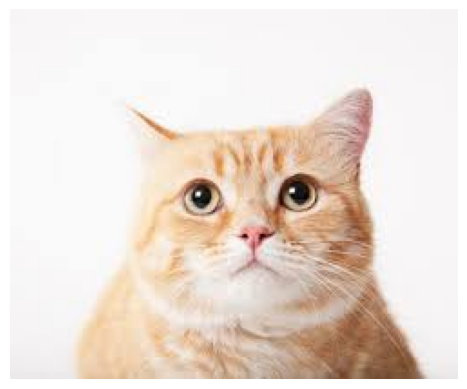

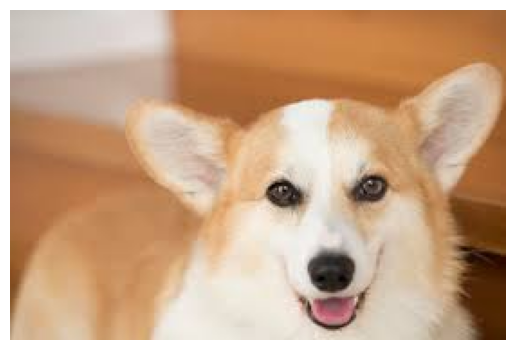

In [3]:
for image in images:
 plt.imshow(image)
 plt.axis('off')
 plt.show()

In [6]:
import cv2
import tensorflow as tf

In [ ]:
resnet50=tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [9]:
file='data/cat.png'
image = np.array(Image.open(file))
image_resized=cv2.resize(image, (224, 224))
image_reshaped = image_resized.reshape([1, 224, 224, 3])
predicted = resnet50.predict(image_reshaped)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.97649669e-07, 3.02679354e-07, 2.28126351e-06, 6.49166907e-07,
        2.48435043e-07, 9.25997028e-06, 4.39047483e-08, 2.38220110e-07,
        2.96193292e-07, 9.15324847e-08, 1.48162922e-08, 1.12828040e-08,
        5.20749932e-09, 5.45523715e-09, 1.00878736e-07, 1.47747530e-08,
        1.16215311e-07, 3.35776974e-07, 4.31287042e-08, 1.17428215e-07,
        2.81111792e-08, 1.61283722e-07, 5.93187188e-08, 1.35897707e-07,
        5.60807969e-08, 1.83065669e-08, 1.27021806e-08, 1.49780526e-08,
        2.08029380e-08, 9.01784517e-07, 4.53565754e-08, 2.84509021e-08,
        2.75998140e-08, 7.55376504e-07, 1.05422055e-06, 1.54055346e-08,
        4.55215741e-07, 7.54217577e-09, 3.44519293e-08, 2.59714774e-08,
        1.62186282e-08, 1.87063023e-08, 2.66565845e-08, 7.09075110e-08,
        1.72603265e-08, 5.77538266e-08, 3.42173578e-08, 1.44074164e-07,
        2.52044519e-09, 1.79304820e-08, 7.40869623e-08, 5.91911373e-07,
        3.36340911e-08, 5.42544321e-08, 2.80044699e-08, 4.607825

In [10]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [11]:
decode_predict = decode_predictions(predicted)
decode_predict

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step


[[('n02110185', 'Siberian_husky', 0.37080002),
  ('n02109961', 'Eskimo_dog', 0.23638253),
  ('n02114548', 'white_wolf', 0.1767965),
  ('n02113186', 'Cardigan', 0.12103628),
  ('n02111889', 'Samoyed', 0.025564663)]]

In [1]:
def predict_image(file):
  import numpy as np
  from PIL import Image
  import matplotlib.pyplot as plt
  
  import cv2
  import tensorflow as tf

  resnet50=tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
  from tensorflow.keras.applications.imagenet_utils import decode_predictions

  image = np.array(Image.open(file))
  image_resized=cv2.resize(image, (224, 224))
  image_reshaped = image_resized.reshape([1, 224, 224, 3])
  predicted = resnet50.predict(image_reshaped)

  decoded_predict = decode_predictions(predicted)
  return decoded_predict

In [2]:
predict = predict_image('data/cat.png')
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[[('n02110185', 'Siberian_husky', 0.37080002),
  ('n02109961', 'Eskimo_dog', 0.23638253),
  ('n02114548', 'white_wolf', 0.1767965),
  ('n02113186', 'Cardigan', 0.12103628),
  ('n02111889', 'Samoyed', 0.025564663)]]